# Test 2. Figures and Statistical Analyses shown in Figure 3.

In [1]:
import os
import sys


# External dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import statsmodels.formula.api as smf

# Local code from this repository
sys.path.append(os.path.join(os.getcwd(), "..", "code"))
from load_data import load_stimulus, load_all_data, extract_new
from plotting import color_by_reward, color_by_callType, plot_data, set_oddsratio_yticks
from stats import false_discovery, get_odds_ratio_matrix, fisher_exact, jackknife


# The diretory for saving figures - Change to place of your choice
FIGDIR = os.path.expanduser('~/Desktop/')

# The behavioral data is stored in csv files in the data directory
PROJDIR = ".."
DATADIR = "../data/confusion/"
RESULTDIR = "../results/"

Add or remove WhiHpi in the block below to get data for that bird. We don't have the complete data for this bird. And report both in the paper.

In [2]:
all_df = load_all_data()

# This bird does not have any date for control
all_df = all_df[all_df['bird'] != 'WhiHpi7966F']

# These are three days of interes: the 4v4 day (learning), the congruent 8v8 (control), the inconcruent 4v4+4v4 (confusing)
learning_df = all_df[all_df['day'] == 'learning']
control_df = all_df[all_df['day'] == 'control']
confusing_df = all_df[all_df['day'] == 'confusing']
# naive_df = all_df[all_df['day'] == 'naif']


# add an informative trial column
def inject_ITS(df) :
    Informative_Trials_Seen = []
    for subject in df['bird'].unique() :
        subject_df = df[df['bird'] == subject]
        ITS = 0
        for _,row in subject_df.iterrows():
            Informative_Trials_Seen.append(ITS)
            if row.response == False :
                ITS += 1
    df["Informative Trials Seen"] = Informative_Trials_Seen
    return(df)

learning_df = inject_ITS(learning_df)
control_df = inject_ITS(control_df)
confusing_df = inject_ITS(confusing_df)


birds = all_df['bird'].unique()

/var/folders/st/czd2s3fn20q2nbmgdybh35nh0000gn/T/ipykernel_50017/702693143.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Informative Trials Seen"] = Informative_Trials_Seen
/var/folders/st/czd2s3fn20q2nbmgdybh35nh0000gn/T/ipykernel_50017/702693143.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Informative Trials Seen"] = Informative_Trials_Seen
/var/folders/st/czd2s3fn20q2nbmgdybh35nh0000gn/T/ipykernel_50017/702693143.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [3]:
# Get some statistis on the number of stimuli
Te_vocalizers = all_df.loc[(all_df['Stimulus Call Type'] == 'TE')]['Stimulus Vocalizer'].unique()
print('Number of Te vocalizers', len(Te_vocalizers))
for bird in Te_vocalizers:
    print('\t Vocalizer:', bird, ' # stim', len(all_df.loc[(all_df['Stimulus Call Type'] == 'TE') & (all_df['Stimulus Vocalizer'] == bird)]['stimulus_name'].unique()))
          
print('\t Total', len(all_df.loc[(all_df['Stimulus Call Type'] == 'TE')]['stimulus_name'].unique()))

Th_vocalizers = all_df.loc[(all_df['Stimulus Call Type'] == 'TH')]['Stimulus Vocalizer'].unique()
print('Number of Th vocalizers', len(Th_vocalizers))
for bird in Th_vocalizers:
    print('\t Vocalizer:', bird, ' # stim', len(all_df.loc[(all_df['Stimulus Call Type'] == 'TH') & (all_df['Stimulus Vocalizer'] == bird)]['stimulus_name'].unique()))
          
print('\t Total', len(all_df.loc[(all_df['Stimulus Call Type'] == 'TH')]['stimulus_name'].unique()))

DC_vocalizers = all_df.loc[(all_df['Stimulus Call Type'] == 'DC')]['Stimulus Vocalizer'].unique()
print('Number of DC vocalizers', len(DC_vocalizers))
for bird in DC_vocalizers:
    print('\t Vocalizer:', bird, ' # stim', len(all_df.loc[(all_df['Stimulus Call Type'] == 'DC') & (all_df['Stimulus Vocalizer'] == bird)]['stimulus_name'].unique()))
          
print('\t Total', len(all_df.loc[(all_df['Stimulus Call Type'] == 'DC')]['stimulus_name'].unique()))

print('Total', len(all_df['stimulus_name'].unique()))

Number of Te vocalizers 12
	 Vocalizer: BluRas07dd  # stim 77
	 Vocalizer: BlaLbl8026  # stim 109
	 Vocalizer: GreOra1817  # stim 69
	 Vocalizer: WhiGra0114  # stim 79
	 Vocalizer: WhiBlu4818  # stim 218
	 Vocalizer: WhiWhi1415  # stim 78
	 Vocalizer: WhiLbl0010  # stim 136
	 Vocalizer: WhiBlu5698  # stim 109
	 Vocalizer: GraGra0201  # stim 71
	 Vocalizer: PurRas20dd  # stim 140
	 Vocalizer: LblRed0613  # stim 139
	 Vocalizer: GreWhi1242  # stim 140
	 Total 1365
Number of Th vocalizers 12
	 Vocalizer: GreOra1817  # stim 116
	 Vocalizer: GraGra0201  # stim 117
	 Vocalizer: WhiWhi1415  # stim 60
	 Vocalizer: WhiBlu4917  # stim 60
	 Vocalizer: HPiHPi4748  # stim 146
	 Vocalizer: BlaBla0506  # stim 116
	 Vocalizer: WhiGra0114  # stim 60
	 Vocalizer: WhiRas44dd  # stim 60
	 Vocalizer: LblRed0613  # stim 30
	 Vocalizer: WhiBlu5698  # stim 26
	 Vocalizer: WhiBlu4818  # stim 28
	 Vocalizer: Unknown000  # stim 27
	 Total 846
Number of DC vocalizers 12
	 Vocalizer: BlaBla0506  # stim 100
	 Vocal

In [4]:
# Get the old and new vocalizers.  This code assumes that all birds had the same training

new_vocalizers_confusing_TEvsDC = confusing_df.loc[ (confusing_df['Stimulus Call Type'] == 'TE') & (confusing_df['bol_Confusing'] & (confusing_df['test'] == 'DCvsTET')), 'Stimulus Vocalizer'].unique()
new_vocalizers_confusing_TEvsTH = confusing_df.loc[ (confusing_df['Stimulus Call Type'] == 'TE') & (confusing_df['bol_Confusing'] & (confusing_df['test'] == 'THvsTET')), 'Stimulus Vocalizer'].unique()
new_vocalizers_confusing_TH = confusing_df.loc[ (confusing_df['Stimulus Call Type'] == 'TH') & (confusing_df['bol_Confusing']), 'Stimulus Vocalizer'].unique()
new_vocalizers_confusing_DC = confusing_df.loc[ (confusing_df['Stimulus Call Type'] == 'DC') & (confusing_df['bol_Confusing']), 'Stimulus Vocalizer'].unique()

old_vocalizers_confusing_TEvsDC = confusing_df.loc[ (confusing_df['Stimulus Call Type'] == 'TE') & (confusing_df['bol_Confusing'] == False) & (confusing_df['test'] == 'DCvsTET'), 'Stimulus Vocalizer'].unique()
old_vocalizers_confusing_TEvsTH = confusing_df.loc[ (confusing_df['Stimulus Call Type'] == 'TE') & (confusing_df['bol_Confusing'] == False) & (confusing_df['test'] == 'THvsTET'), 'Stimulus Vocalizer'].unique()
old_vocalizers_confusing_TH = confusing_df.loc[ (confusing_df['Stimulus Call Type'] == 'TH') & (confusing_df['bol_Confusing'] == False), 'Stimulus Vocalizer'].unique()
old_vocalizers_confusing_DC = confusing_df.loc[ (confusing_df['Stimulus Call Type'] == 'DC') & (confusing_df['bol_Confusing'] == False), 'Stimulus Vocalizer'].unique()

old_vocalizers_control_TEvsDC = learning_df.loc[ (learning_df['Stimulus Call Type'] == 'TE') & (learning_df['test'] == 'DCvsTET') , 'Stimulus Vocalizer'].unique()
old_vocalizers_control_TEvsTH = learning_df.loc[ (learning_df['Stimulus Call Type'] == 'TE') & (learning_df['test'] == 'THvsTET') , 'Stimulus Vocalizer'].unique()
old_vocalizers_control_TH = learning_df.loc[ (learning_df['Stimulus Call Type'] == 'TH'), 'Stimulus Vocalizer'].unique()
old_vocalizers_control_DC = learning_df.loc[ (learning_df['Stimulus Call Type'] == 'DC'), 'Stimulus Vocalizer'].unique()

all_vocalizers_control_TEvsDC = control_df.loc[ (control_df['Stimulus Call Type'] == 'TE') & (control_df['test'] == 'DCvsTET'), 'Stimulus Vocalizer'].unique()
all_vocalizers_control_TEvsTH = control_df.loc[ (control_df['Stimulus Call Type'] == 'TE') & (control_df['test'] == 'THvsTET'), 'Stimulus Vocalizer'].unique()
all_vocalizers_control_TH = control_df.loc[ (control_df['Stimulus Call Type'] == 'TH'), 'Stimulus Vocalizer'].unique()
all_vocalizers_control_DC = control_df.loc[ (control_df['Stimulus Call Type'] == 'DC'), 'Stimulus Vocalizer'].unique()

new_vocalizers_control_TEvsDC = list(set(all_vocalizers_control_TEvsDC) - set(old_vocalizers_control_TEvsDC) )
new_vocalizers_control_TEvsTH = list(set(all_vocalizers_control_TEvsTH) - set(old_vocalizers_control_TEvsTH) )
new_vocalizers_control_TH = list(set(all_vocalizers_control_TH) - set(old_vocalizers_control_TH) )
new_vocalizers_control_DC = list(set(all_vocalizers_control_DC) - set(old_vocalizers_control_DC) )



In [5]:
# Checking that old are the same in controls and confusing and that new are different.
# This output is used in extract_new which is in load_data.py
print('TE in TE vs DC:')
print('\t old - controls:', old_vocalizers_control_TEvsDC)
print('\t old - confusing:', old_vocalizers_confusing_TEvsDC)
print('\t new - controls:', new_vocalizers_control_TEvsDC)
print('\t new - confusing:', new_vocalizers_confusing_TEvsDC)

print('TE in TE vs TH:')
print('\t old - controls:', old_vocalizers_control_TEvsTH)
print('\t old - confusing:', old_vocalizers_confusing_TEvsTH)
print('\t new - controls:', new_vocalizers_control_TEvsTH)
print('\t new - confusing:', new_vocalizers_confusing_TEvsTH)

print('TH:')
print('\t old - controls:', old_vocalizers_control_TH)
print('\t old - confusing:', old_vocalizers_confusing_TH)
print('\t new - controls:', new_vocalizers_control_TH)
print('\t new - confusing:', new_vocalizers_confusing_TH)

print('DC:')
print('\t old - controls:', old_vocalizers_control_DC)
print('\t old - confusing:', old_vocalizers_confusing_DC)
print('\t new - controls:', new_vocalizers_control_DC)
print('\t new - confusing:', new_vocalizers_confusing_DC)

TE in TE vs DC:
	 old - controls: ['WhiBlu5698' 'WhiBlu4818' 'WhiLbl0010' 'BlaLbl8026']
	 old - confusing: ['WhiBlu5698' 'WhiBlu4818' 'WhiLbl0010' 'BlaLbl8026']
	 new - controls: ['LblRed0613', 'GreWhi1242', 'GraGra0201', 'PurRas20dd']
	 new - confusing: ['WhiGra0114' 'BluRas07dd' 'GreOra1817' 'WhiWhi1415']
TE in TE vs TH:
	 old - controls: ['PurRas20dd' 'GreWhi1242' 'WhiBlu4818' 'LblRed0613']
	 old - confusing: ['PurRas20dd' 'WhiBlu4818' 'GreWhi1242' 'LblRed0613']
	 new - controls: ['BlaLbl8026', 'WhiBlu5698', 'GreOra1817', 'WhiLbl0010']
	 new - confusing: ['WhiGra0114' 'GraGra0201' 'WhiWhi1415' 'BluRas07dd']
TH:
	 old - controls: ['GreOra1817' 'HPiHPi4748' 'BlaBla0506' 'GraGra0201']
	 old - confusing: ['GreOra1817' 'BlaBla0506' 'HPiHPi4748' 'GraGra0201']
	 new - controls: ['LblRed0613', 'WhiBlu5698', 'Unknown000', 'WhiBlu4818']
	 new - confusing: ['WhiRas44dd' 'WhiGra0114' 'WhiWhi1415' 'WhiBlu4917']
DC:
	 old - controls: ['YelGre5275' 'BlaLbl8026' 'BlaBla0506' 'WhiBlu4917']
	 old - c

In [6]:
print('Call type tested:', all_df['Stimulus Call Type'].unique())
print('Day types;', all_df['day'].unique())

Call type tested: ['TE' 'DC' 'TH']
Day types; ['return-to-normal' 'control' 'confusing' 'learning' 'naif']


### Get color and marker code

In [7]:
color_by_call = {
    'TE' : '#9BCD9B',
    'DC' : 'lightseagreen',
    'TH' : 'tan',
    'old' : '#9bcd7b',
    'new' : '#80b1d3',
    'THvsTET' : '#9BCD9B',
    'DCvsTET' : 'lightseagreen'
}

test_marker_code = {
    'THvsTET' : 'o',
    'DCvsTET' : 'd',
    'old' : 'X',
    'new' : 'o'
}

marker_by_test = {
    'DCvsTET' : 'o' ,
    'THvsTET' : 'x' ,
    'old' : 'x',
    'new' : 'o'
}


# Congruant and incongruant performance summarized (overall)

Data is collected into a table on just evaluation days. This includes each subject's odds ratio comparing their odds of interrupting nonrewarded trials to rewarded trials.

D. Average Odds Ratio for new and old stimuli on congruant and incongruent days. Birds don't show any difference for the congruent day (p = 0.06299) but shows a great difference on the incongruent day (p = 0.00310). Error bars show 2 SEM. All bird significantly learned the congruent stimuli, and 4 birds were still significantly categorizing the incongruent stimuli with their call types. 

In [8]:
def compute_odds_ratio(group, versus, side = 'two.sided', zero_correction = True): 
    
    dums = [
        [len(group[group["response"] == True]),
        len(group[group["response"] == False])],
        [len(versus[versus["response"] == True]),
        len(versus[versus["response"] == False])]
    ]

    return fisher_exact(np.asarray(dums), side=side, zero_correction=zero_correction)

def compute_odds_ratioAVG(group, versus, side = 'two.sided', zero_correction = True): 
    
    # Calculate a weighed average probability of interruption from the "versus" side
    groupedVersus = versus.groupby(["condition_name"])
    versusNoRe = versus.loc[groupedVersus.groups["Unrewarded"]]
    versusRe = versus.loc[groupedVersus.groups["Rewarded"]]
    pInt = 0.5*(len(versusRe[versusRe["response"] == True])/len(versusRe) + len(versusNoRe[versusNoRe["response"] == True])/len(versusNoRe))
    nEff = 2.0/(1/len(versusRe) + 1/len(versusNoRe))  # Effective sample size from harmonic mean
    nInt = int(pInt*nEff)

    dums = [
        [len(group[group["response"] == True]),
        len(group[group["response"] == False])],
        [nInt, nEff-nInt]
    ]

    return fisher_exact(np.asarray(dums), side=side, zero_correction=zero_correction)

In [9]:
# modified from pecking_analysis
def windows_by_index(df, n=10):   
    counter = 0
    break_points = [0]
    for i in range(len(df)):
        counter += 1
        if (counter >= n):
            break_points.append(df["index"].iloc[i] + 1)
            counter = 0


    if df["index"].iloc[-1] > break_points[-1]:
        break_points.append(df["index"].iloc[-1] + 1)

    return [
        df[(break_points[i] <= df["index"]) & (break_points[i + 1] > df["index"])]
        for i in range(len(break_points) - 1)
    ]


def plot_oddsratio(new_df, old_df, window_size=10, sigFlag = False, sig_threshold=0.05, plt_title=None, ax=None, biggest = None, ylabels=True, choosingBasedOnP=False):


    if ax == None:
        fig = plt.figure(figsize=(2, 1.5), dpi=80)
        ax = plt.axes()
                    
    if plt_title:
        ax.set_title(plt_title)

    if (new_df is old_df):
        linestyle = 'solid'
    else:
        linestyle = 'dotted'

                    
    groupedNew = new_df.groupby(["condition_name", "Stimulus Call Type"])
    groupedOld = old_df.groupby(["condition_name"])

    
    if (biggest is None) :
        biggest = 0
        fitBiggest = True
    else:
        biggest = np.log2(biggest)
        fitBiggest = False
        
    for (rewarded, call_type), group in sorted(groupedNew.groups.items(),key=lambda x: (x[0][0], x[0][1])):

        group = new_df.loc[group] 
        if (rewarded == 'Rewarded'):
            alts = old_df.loc[groupedOld.groups["Unrewarded"]]
            altsOpp = old_df.loc[groupedOld.groups["Rewarded"]]
            
        else:
            alts = old_df.loc[groupedOld.groups["Rewarded"]]
            altsOpp = old_df.loc[groupedOld.groups["Unrewarded"]]

        # windowed, windowed_rest = windows_by_reward(group, alts, rewarded == "Rewarded", n=window_size)
        windowed = windows_by_index(group, n=window_size)

        x = []
        y = []
        sigs = []
        cum = 0

        for window in windowed:
            x.append(np.mean(window["index"]))
            cum += len(window)
            
            # 3 possible values of odd ratios
            odds, interval95, pvalue, oddsSE = compute_odds_ratio(window, alts, side='two.sided')
            oddsOpp, interval95Opp, pvalueOpp, oddsSEOpp = compute_odds_ratio(window, altsOpp, side='two.sided')
            oddsAvg, interval95, pvalueAvg, oddsSE = compute_odds_ratioAVG(window, old_df, side='two.sided')
            
            if choosingBasedOnP :
                if ( (pvalue < sig_threshold) & (pvalueOpp < sig_threshold)):  # if sig different than both Re and NoRe, then compare to average
                    y.append(oddsAvg)
                    sigs.append(pvalueAvg < sig_threshold)
                elif pvalue < pvalueOpp :
                    y.append(odds)
                    sigs.append(pvalue < sig_threshold) # / len(windowed))
                else:
                    y.append(oddsOpp)
                    sigs.append(pvalueOpp < sig_threshold)
            else:
                # Taking the Odds relative to average probability of interruption
                y.append(1/oddsAvg)
                sigs.append(pvalueAvg < sig_threshold)


            color = color_by_callType.get(call_type)
            if len(x) > 1:
                if (rewarded == 'Unrewarded'):
                    ax.plot(x, y, color=color, linewidth=1, linestyle = linestyle)
                else :
                    ax.plot(x, y, color=color, linewidth=1, linestyle = linestyle, marker = 'o', markerfacecolor = 'k' )
            else:
                ax.scatter(x, y, s=5, marker="x", color=color)

            if fitBiggest:
                biggest = max(np.max(np.round(1 + np.abs(np.log2(np.array(y))))), biggest)

            # Make lines thicker is OR is significantly different from 1.    
            if (sigFlag):            
                for ix in range(len(x)):
                    if sigs[ix]:
                        if ix > 0:
                            k = (np.log(y[ix])-np.log(y[ix-1]))/(x[ix]-x[ix-1])
                            dx = (x[ix]-x[ix-1])/2
                            ax.plot( [(x[ix-1]+x[ix])/2, x[ix]], [np.exp(np.log(y[ix-1])+ k*dx), y[ix]], color=color, linewidth=2, linestyle=linestyle)
                        if ix < len(x)-1:
                            k = (np.log(y[ix+1])-np.log(y[ix]))/(x[ix+1]-x[ix])
                            dx = (x[ix+1]-x[ix])/2
                            ax.plot( [x[ix], (x[ix+1]+x[ix])/2], [y[ix], np.exp(np.log(y[ix]) +k*dx)], color=color, linewidth=2, linestyle=linestyle)
  
                        
    #plt.xlim(0, np.max(block.data["OverallTrial"]))
    set_oddsratio_yticks(ax, biggest, ylabels = ylabels)
    ax.minorticks_off()
    ax.hlines(1, xmin=ax.get_xlim()[0], xmax = ax.get_xlim()[1], linestyle="--", color = 'k', linewidth = 1)
    return ax

            
            

-----------------------------  Bird  HpiXXX7700M  ----------------------------------------
Yscale:  256 Window Size:  70


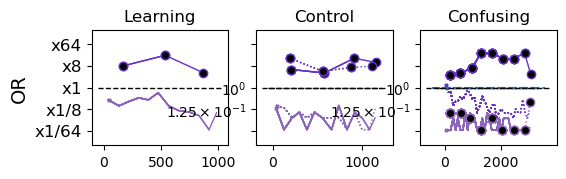

-----------------------------  Bird  BluGre3435F  ----------------------------------------
Yscale:  128 Window Size:  60


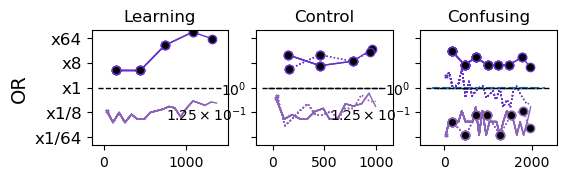

-----------------------------  Bird  GreGre1819F  ----------------------------------------
Yscale:  32 Window Size:  20


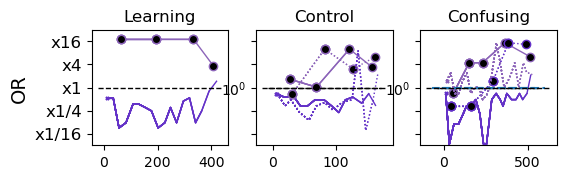

-----------------------------  Bird  HpiGre2990M  ----------------------------------------
Yscale:  32 Window Size:  20


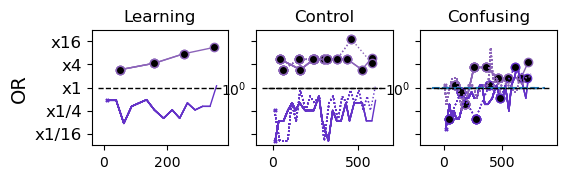

-----------------------------  Bird  GreBlu4813M  ----------------------------------------
Yscale:  32 Window Size:  20


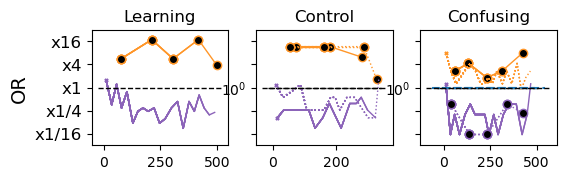

-----------------------------  Bird  RedYel0836M  ----------------------------------------
Yscale:  32 Window Size:  20


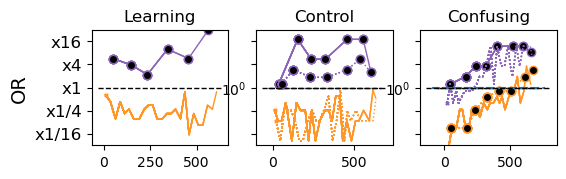

-----------------------------  Bird  LblGre1214F  ----------------------------------------
Yscale:  32 Window Size:  20


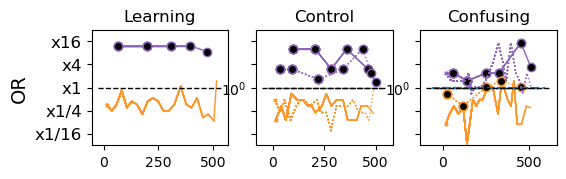

In [10]:
# for example_subject in birds:
# example_subject = "GreBlu4813M"  - in case you want one but all are good.

for example_subject in birds:
    
    if (example_subject == 'HpiXXX7700M'):
        biggest = 256
        window_size = 70
    elif ( example_subject == 'BluGre3435F'):
        biggest = 128
        window_size = 60
    else:
        biggest = 32
        window_size = 20

    print('-----------------------------  Bird ', example_subject, ' ----------------------------------------')
    print("Yscale: ", biggest, "Window Size: ", window_size)
    
    fig, ax = plt.subplots(1, 3, figsize=(6, 1.5), dpi=100)
    # 4 v 4 day 
    subject_df = learning_df[learning_df["bird"] == example_subject]
    if (subject_df.size != 0) :
        plot_oddsratio(subject_df, subject_df, ax = ax[0], plt_title = 'Learning', ylabels = True, biggest = biggest, window_size = window_size)
    
    # 8v8 control day
    subject_df = control_df[control_df["bird"] == example_subject]
    if (subject_df.size != 0) :
        test = subject_df['test'].unique()[0]
        new_control_df, old_control_df = extract_new(subject_df, test)
        plot_oddsratio(old_control_df, old_control_df, ax = ax[1], plt_title = 'Control', ylabels = False, biggest = biggest, window_size=window_size/2)
        plot_oddsratio(new_control_df, old_control_df, ax = ax[1], plt_title = 'Control', ylabels = False, biggest = biggest, window_size=window_size/2)
    
    # 8v8 confusing day
    subject_df = confusing_df[confusing_df["bird"] == example_subject]
    if (subject_df.size != 0) :
        test = subject_df['test'].unique()[0]
        new_confusion_df, old_confusion_df = extract_new(subject_df, test)
        plot_oddsratio(old_confusion_df, old_confusion_df, ax = ax[2], plt_title = 'Confusing', ylabels = False, biggest = biggest, window_size=window_size/2)
        plot_oddsratio(new_confusion_df, old_confusion_df, ax = ax[2], plt_title = 'Confusing', ylabels = False, biggest = biggest, window_size=window_size/2)
    
    plt.savefig(FIGDIR+example_subject+'_ORplots.svg', format="svg", bbox_inches="tight")
    plt.show()



### Overall Odds Ratio

In [11]:
#### separate old / new stimluli for the control (congruent) and confusing (incongruent) days.

new_control_df_DC, old_control_df_DC = extract_new(control_df[control_df['test'] == 'DCvsTET'], 'DCvsTET')
new_control_df_TH, old_control_df_TH = extract_new(control_df[control_df['test'] == 'THvsTET'], 'THvsTET')
new_confusing_df_DC, old_confusing_df_DC = extract_new(confusing_df[confusing_df['test'] == 'DCvsTET'], 'DCvsTET')
new_confusing_df_TH, old_confusing_df_TH = extract_new(confusing_df[confusing_df['test'] == 'THvsTET'], 'THvsTET')

old_control_df = pd.concat([old_control_df_DC, old_control_df_TH])
new_control_df = pd.concat([new_control_df_DC, new_control_df_TH])
old_confusing_df = pd.concat([old_confusing_df_DC, old_confusing_df_TH])
new_confusing_df = pd.concat([new_confusing_df_DC, new_confusing_df_TH])

new_control_df = inject_ITS(new_control_df)
old_control_df = inject_ITS(old_control_df)
new_confusing_df = inject_ITS(new_confusing_df)
old_confusing_df = inject_ITS(old_confusing_df)

In [12]:
# Creates a table (summary_df) of the overall odds ratio of each subject during the test day for
# the following conditions: SovsSo, DCvsDC, AllvsAll
conf_summary_df_rows = []
conf_countdata_df_rows = []

def get_summary_rows(ctx_df, condition):
    for subject in ctx_df.bird.unique():
        subject_df = ctx_df[ctx_df.bird == subject]
        test = subject_df['test'].unique()[0]
        trained_reward = subject_df['trained_reward'].unique()[0]
        
        rewarded_set = subject_df[(subject_df["condition_name"] == "Rewarded")]
        nonrewarded_set = subject_df[(subject_df["condition_name"] == "Unrewarded")]
        
        table = get_odds_ratio_matrix(nonrewarded_set, rewarded_set, "Interrupt")
        odds, interval95, p_value, se_logor = fisher_exact(table, side="two.sided")

        conf_summary_df_rows.append(
            [
                subject, test, trained_reward, condition, table[0,0], table[1,0], table[0,1], table[1,1], odds, interval95[0], interval95[1], np.log(odds), se_logor, p_value
            ]
        )
        conf_countdata_df_rows.append(
            [
                subject, test, trained_reward, condition, table[0,0], table[1,0], 'N' 
            ]
        )
        conf_countdata_df_rows.append(
            [
                subject, test, trained_reward, condition, table[0,1], table[1,1], 'Y' 
            ]
        )

get_summary_rows(learning_df, 'Learning')
get_summary_rows(old_confusing_df, 'Normal')
get_summary_rows(new_confusing_df, 'Confusing')
get_summary_rows(old_control_df, 'old_congruant')
get_summary_rows(new_control_df, 'new_congruant')


        
conf_summary_df = pd.DataFrame(
    conf_summary_df_rows,
    columns=["Subject", 'test', 'trained_reward', 'Condition', "Int NoRe", "NoInt NoRe", "IntRe", "noInt Re", "Odds Ratio", "95 CI Lower", "95 CI Upper", "LogOR", "SE(LogOR)", "p-value"]
)

conf_countdata_df = pd.DataFrame(
    conf_countdata_df_rows,
    columns=["Subject", 'test', 'trained_reward', 'Condition', "Int", "NoInt", "Re"]
)
conf_countdata_df.to_csv(RESULTDIR+'/resultsConfusionR.csv', index=True, header=True)

Run the cell below to get data for bird with missing control

In [ ]:
testMissingBird = False
if (testMissingBird):

    birdName = 'WhiHpi7966F'
    row = conf_summary_df.loc[(conf_summary_df['Subject'] == bird) & (conf_summary_df['Condition'] == 'Learning')]
    print('Bird %s Learning performance log2(OR) = %.2f [%.3f, %.3f] p different from 1 = %.3g' % (birdName, np.log2(row['Odds Ratio'].iloc[0]),
                                                                                              np.log2(row['Odds Ratio'].iloc[0]) - 2.0*row['SE(LogOR)'].iloc[0]/np.log(2),
                                                                                              np.log2(row['Odds Ratio'].iloc[0]) + 2.0*row['SE(LogOR)'].iloc[0]/np.log(2), 
                                                                                              row['p-value'].iloc[0] ))

    row = conf_summary_df.loc[(conf_summary_df['Subject'] == bird) & (conf_summary_df['Condition'] == 'Confusing')]
    print('Bird %s Confusing Day (New-Incongruent) performance log2(OR) = %.2f [%.3f, %.3f] p different from 1 = %.3g' % (birdName, np.log2(row['Odds Ratio'].iloc[0]),
                                                                                              np.log2(row['Odds Ratio'].iloc[0]) - 2.0*row['SE(LogOR)'].iloc[0]/np.log(2),
                                                                                              np.log2(row['Odds Ratio'].iloc[0]) + 2.0*row['SE(LogOR)'].iloc[0]/np.log(2), 
                                                                                              row['p-value'].iloc[0] ))

    row = conf_summary_df.loc[(conf_summary_df['Subject'] == bird) & (conf_summary_df['Condition'] == 'new_congruant')]
    print('Bird %s Confusing Day (Old-Congruent) performance log2(OR) = %.2f [%.3f, %.3f] p different from 1 = %.3g' % (birdName, np.log2(row['Odds Ratio'].iloc[0]),
                                                                                              np.log2(row['Odds Ratio'].iloc[0]) - 2.0*row['SE(LogOR)'].iloc[0]/np.log(2),
                                                                                              np.log2(row['Odds Ratio'].iloc[0]) + 2.0*row['SE(LogOR)'].iloc[0]/np.log(2), 
                                                                                              row['p-value'].iloc[0] ))



In [14]:
# Stats
print("two-sided test : are the data different from 1 ?" )

i = 0
for condition in conf_summary_df['Condition'].unique() :
    # 1. Test how many subjects had odds ratios significantly greater than 1, for the new and old call types, 
    # during the congruent and incongruent days
    df = conf_summary_df[(conf_summary_df["Condition"] == condition)]
    n = len(df)
    alpha = 0.01 / n
    print("%s:" % (condition), np.sum(df["p-value"] < alpha), "out of", n, "significant")
    i+=1

conf_points = conf_summary_df[conf_summary_df['Condition'] == "Confusing"]["Odds Ratio"]
norm_points = conf_summary_df[conf_summary_df['Condition'] == "Normal"]["Odds Ratio"]
old_points = conf_summary_df[conf_summary_df['Condition'] == "old_congruant"]["Odds Ratio"]
new_points = conf_summary_df[conf_summary_df['Condition'] == "new_congruant"]["Odds Ratio"]

# 2. Compute 95% CIs for the new and old voca;izers during the 2 days, across subjects, and do a paired t-test
conf_mean = 2 ** np.mean(np.log2(conf_points))
norm_mean = 2 ** np.mean(np.log2(norm_points))
old_mean = 2 ** np.mean(np.log2(old_points))
new_mean = 2 ** np.mean(np.log2(new_points))

conf_interval_95 = [
    2 ** (np.mean(np.log2(conf_points)) - (2 * np.std(np.log2(conf_points)) / np.sqrt(len(conf_points)))),
    2 ** (np.mean(np.log2(conf_points)) + (2 * np.std(np.log2(conf_points)) / np.sqrt(len(conf_points))))
]
norm_interval_95 = [
    2 ** (np.mean(np.log2(norm_points)) - (2 * np.std(np.log2(norm_points)) / np.sqrt(len(norm_points)))),
    2 ** (np.mean(np.log2(norm_points)) + (2 * np.std(np.log2(norm_points)) / np.sqrt(len(norm_points))))
]
new_interval_95 = [
    2 ** (np.mean(np.log2(new_points)) - (2 * np.std(np.log2(new_points)) / np.sqrt(len(new_points)))),
    2 ** (np.mean(np.log2(new_points)) + (2 * np.std(np.log2(new_points)) / np.sqrt(len(new_points))))
]
old_interval_95 = [
    2 ** (np.mean(np.log2(old_points)) - (2 * np.std(np.log2(old_points)) / np.sqrt(len(old_points)))),
    2 ** (np.mean(np.log2(old_points)) + (2 * np.std(np.log2(old_points)) / np.sqrt(len(old_points))))
]

# Paired t-test
congruent_stat_test = scipy.stats.ttest_rel(
    np.log2(new_points),
    np.log2(old_points))

incongruent_stat_test = scipy.stats.ttest_rel(
    np.log2(norm_points),
    np.log2(conf_points))

two-sided test : are the data different from 1 ?
Learning: 7 out of 7 significant
Normal: 7 out of 7 significant
Confusing: 4 out of 7 significant
old_congruant: 7 out of 7 significant
new_congruant: 7 out of 7 significant


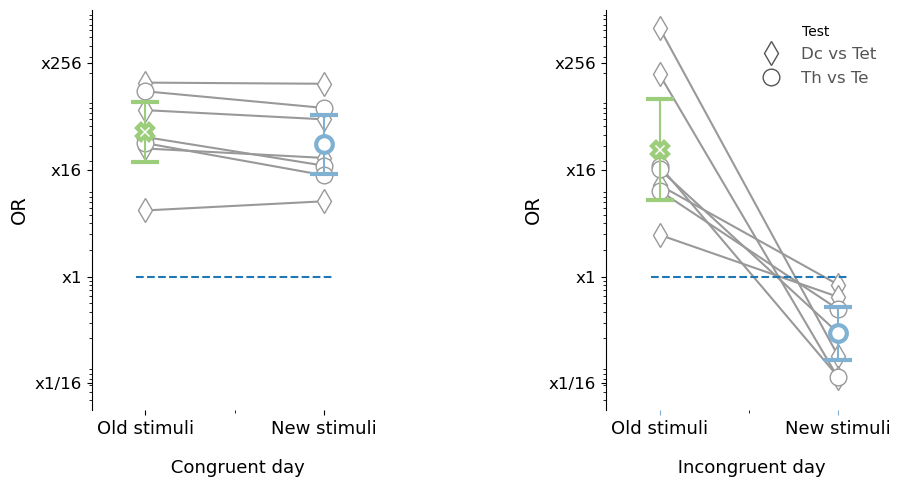



Result of Paired t-test for incongruent day:

Old mean OR: 4.76 [2.86, 6.65]
New mean OR: -2.13 [-3.13, -1.14]
p-value: 0.00310 *




Result of Paired t-test  for congruent day:

Old mean OR: 5.43 [4.29, 6.56]
New mean OR: 4.95 [3.86, 6.05]
p-value: 0.06299 




In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.8,
                    hspace=0.1)

for subject in conf_summary_df.Subject.unique():
    conf_row = conf_summary_df[(conf_summary_df.Subject == subject) & (conf_summary_df["Condition"] == "Confusing")]
    norm_row = conf_summary_df[(conf_summary_df.Subject == subject) & (conf_summary_df["Condition"] == "Normal")]
    old_row = conf_summary_df[(conf_summary_df.Subject == subject) & (conf_summary_df["Condition"] == "old_congruant")]
    new_row = conf_summary_df[(conf_summary_df.Subject == subject) & (conf_summary_df["Condition"] == "new_congruant")]

    conf_or = conf_row.iloc[0]["Odds Ratio"] if len(conf_row) else np.nan
    norm_or = norm_row.iloc[0]["Odds Ratio"] if len(norm_row) else np.nan
    old_or = old_row.iloc[0]["Odds Ratio"] if len(old_row) else np.nan
    new_or = new_row.iloc[0]["Odds Ratio"] if len(new_row) else np.nan
    
    subject_test = conf_summary_df[conf_summary_df['Subject'] == subject].test.unique()[0]
    
    ax1.plot(
    [0,1],
    [old_or, new_or],
    marker= test_marker_code[subject_test],
    color="#999999",
    markerfacecolor="White",
    markersize=12,
    zorder=0,
    )
    
    ax2.plot(
    [0,1],
    [norm_or, conf_or],
    marker= test_marker_code[subject_test],
    color="#999999",
    markerfacecolor="White",
    markersize=12,
    zorder=0,
    )

set_oddsratio_yticks(ax1, 10, -5) 
ax1.set_xlim(-0.3, 1.3)
ax1.set_xticks([0, 1], ["Old stimuli", "New stimuli"], fontsize=13)
ax1.set_xticks([0.5], ["\n\n Congruent day"], fontsize=13, minor =True)

ax1.spines["top"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.spines["right"].set_visible(False)

set_oddsratio_yticks(ax2, 10, -5) 
ax2.set_xlim(-0.3, 1.3)
ax2.set_xticks([0, 1], ["Old stimuli", "New stimuli"], fontsize=13)
ax2.tick_params(axis='x', color = color_by_call['new'])
ax2.set_xticks([0.5], ["\n\n Incongruent day"], fontsize=13, minor =True)


ax2.spines["top"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.spines["right"].set_visible(False)

for mean, int95, stim_type,i in zip([old_mean, new_mean],[old_interval_95, new_interval_95],['old', 'new'],[0,1]):
    ax1.errorbar(
        i,
        mean,
        yerr=[
            [mean - int95[0]],
            [int95[1] - mean,]
            ],
        marker=test_marker_code[stim_type],
        color=color_by_call[stim_type],
        capsize=10,
        markerfacecolor="White",
        markersize=12,
        markeredgewidth=3,
    )

for mean, int95, stim_type,i in zip([norm_mean, conf_mean],[norm_interval_95, conf_interval_95],['old', 'new'],[0,1]):
    ax2.errorbar(
        i,
        mean,
        yerr=[
            [mean - int95[0]],
            [int95[1] - mean,]
            ],
        marker=test_marker_code[stim_type],
        color=color_by_call[stim_type],
        capsize=10,
        markerfacecolor="White",
        markersize=12,
        markeredgewidth=3,
    )


dcte_artist = plt.Line2D((0,1),(0,0), color='#555555', marker='d', linestyle='', markersize=12, markerfacecolor="White")
teth_artist = plt.Line2D((0,1),(0,0), color='#555555', marker='o', linestyle='', markersize=12, markerfacecolor="White")
plt.legend(
    [dcte_artist, teth_artist], 
    ["Dc vs Tet", "Th vs Te"],
    ncol=1, 
    frameon=False,
    fontsize=12, 
    title = 'Test',
    labelcolor = '#555555'
)

plt.show()
fig.savefig(FIGDIR + "1_overall_results.svg", format="svg", bbox_inches="tight")
plt.close(fig)


print("""

Result of Paired t-test for incongruent day:

Old mean OR: {0:.2f} [{1[0]:.2f}, {1[1]:.2f}]
New mean OR: {2:.2f} [{3[0]:.2f}, {3[1]:.2f}]
p-value: {4:.5f} {5}

""".format(np.log2(norm_mean), np.log2(norm_interval_95), np.log2(conf_mean), np.log2(conf_interval_95), incongruent_stat_test.pvalue, "*" if incongruent_stat_test.pvalue < 0.05 else ""))


print("""

Result of Paired t-test  for congruent day:

Old mean OR: {0:.2f} [{1[0]:.2f}, {1[1]:.2f}]
New mean OR: {2:.2f} [{3[0]:.2f}, {3[1]:.2f}]
p-value: {4:.5f} {5}

""".format(np.log2(old_mean), np.log2(old_interval_95), np.log2(new_mean), np.log2(new_interval_95), congruent_stat_test.pvalue, "*" if congruent_stat_test.pvalue < 0.05 else ""))


## Learning curves as function of informative trials

Learning curves are analyzed by plotting the behavioral response (probability of interruption) as a function of informative trials (see text) for rewarded (Re; blue) and non-rewarded vocalizers (NoRe; red).

In [16]:
from functools import partial

def inject_relative_informative_trials_aude(df):
    
    RIT_learning_df = pd.DataFrame()

    for subject, subject_df in df.groupby('bird') :
        subject_df["Relative Informative Trials Seen"] = subject_df["Informative Trials Seen"]
        for (vocalizer, call_type), subdf in subject_df.groupby(["Stimulus Vocalizer", "Stimulus Call Type"]):
            ITS = 0
            RITS = []
            for _,row in subdf.iterrows():
                RITS.append(ITS)
                if row.response == False :
                    ITS += 1
            subject_df.loc[subdf.index, "Relative Informative Trials Seen"] = RITS
        RIT_learning_df = pd.concat([RIT_learning_df, subject_df])
    return RIT_learning_df


def generate_informative_trial_dataframe(df, informative_trials):
    """Generate a dataframe with interruption data per bin per subject per stimulus
    from the selected trials
    """
    # The "Informative Trials Seen" column counts informative trials seen for a given stim across
    # all sessions run for a subject. The given dataframe may only include trials from a selected
    # epoch which may not include the first sessions. So we create a new "Relative Informative Trials Seen"
    # column that shows number of informative trials seen relative to the start of the requested range.
    df = inject_relative_informative_trials_aude(df)
    output_rows = []
    for bin_idx in informative_trials:
        bin_df = df[df["Relative Informative Trials Seen"] == bin_idx]
        for (subject, subject_sex, vocalizer, call_type, rewarded), stim_df in bin_df.groupby([
                    "bird", "Subject Sex", "Stimulus Vocalizer", "Stimulus Call Type", "condition_name"
                ]):
            output_rows.append([
                subject,
                subject_sex,
                vocalizer,
                call_type,
                rewarded,
                bin_idx,
                len(stim_df),
                np.mean(stim_df["response"])  # This should be just  1 - (1 / len(stim_df))
            ])
            
    return pd.DataFrame(output_rows, columns=["bird", "Subject Sex", "Stimulus Vocalizer", "Stimulus Call Type",
            "condition_name", "Relative Informative Trials Seen", "Bin Size", "p(interrupt)"])


def process_learning_curve_data(df, informative_trials):
    """
    Collect probability of interruption across subjects in each informative trial bin
    
    df: pandas DataFrame filtered down to the trials of interest
    informative_trials: numpy array of integers for the informative trial bins requested (e.g. np.arange(10))
    """
    inform_df = generate_informative_trial_dataframe(df, informative_trials)
    
    grouped_by_informative_trials = inform_df.groupby([
        "bird", "Relative Informative Trials Seen", "condition_name"
    ])["p(interrupt)"].mean()

    binned = grouped_by_informative_trials.groupby(
        ["Relative Informative Trials Seen", "condition_name"],
    )
    
    output_rows = []
    for (bin_idx, rewarded), subdf in binned:
        mean, sem = jackknife(subdf, np.mean)
        output_rows.append([bin_idx, rewarded, mean, sem])
    output = pd.DataFrame(output_rows, columns=["Informative Trials", "condition_name", "p(interrupt)", "SEM"])
    output = output.sort_values(["Informative Trials", "condition_name"])
    return output


def plot_learning_curve(df, informative_trials, ax, fill_kwargs, n_sem=2, line_kwargs=None):
    """
    Plot the learning curve across subjects for the given trials
    
    df: pandas DataFrame filtered down to the trials of interest
    informative_trials: numpy array of integers for the informative trial bins requested (e.g. np.arange(10))
    """
    l_df = process_learning_curve_data(df, informative_trials)
    
    for stimulus_class in ["Rewarded", "Unrewarded"]:
        subdf = l_df[l_df["condition_name"] == stimulus_class]
        ax.fill_between(
            subdf["Informative Trials"],
            subdf["p(interrupt)"] - 2 * subdf["SEM"],
            subdf["p(interrupt)"] + 2 * subdf["SEM"],
            color=color_by_reward.get(stimulus_class),
            **fill_kwargs
        )
        if line_kwargs is not None:
            ax.plot(
                subdf["Informative Trials"],
                subdf["p(interrupt)"],
                color=color_by_reward.get(stimulus_class),
                **line_kwargs
            )
    return l_df

In [17]:
def plot_learning_curves_side_by_side(df1, df2, test, informative_trials, ylim=(0, 1)):
    fig = plt.figure(figsize=(10, 4))

    ax_left = fig.add_axes([0.1, 0.1, 0.4, 0.8])
    ax_right = fig.add_axes([0.6, 0.1, 0.4, 0.8])

    df1 = plot_learning_curve(
        df1,
        informative_trials,
        ax_right,
        fill_kwargs=dict(
            alpha=0.4,
            zorder=-1,
        ),
        line_kwargs = dict(
            marker=marker_by_test[test[0]],
            markersize=7,
        )
    )
#     plt.title('New Stimuli', fontsize = 15)

    df2 = plot_learning_curve(
        df2,
        informative_trials,
        ax_left,
        fill_kwargs=dict(
            alpha=0.4,
            zorder=-1,
        ),
        line_kwargs = dict(
            marker=marker_by_test[test[1]],
            markersize=7,
        )
    )
    
    ax_left.set_title('Old Stimuli', fontsize = 15)
    ax_right.set_title('New Stimuli', fontsize = 15)
    for ax in [ax_left, ax_right]:
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)

#  Create legend from custom artist/label lists
        if ax is ax_right:
            unreartist = plt.Line2D((0,1),(0,0), color=color_by_reward.get("Unrewarded"), marker='', linestyle='-')
            reartist = plt.Line2D((0,1),(0,0), color=color_by_reward.get("Rewarded"), marker='', linestyle='-')
            ax.legend(
                [unreartist, reartist],
                ["NoRe", "Re"],
                ncol=1, 
                frameon=False,
                fontsize=16
            )

        # Set limits and axes of plot
        xticks = np.arange(0, np.max(informative_trials) + 2, 10).astype(int)
        ax.set_xlim(0, np.max(informative_trials))
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticks, fontsize=16)
        ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
        ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=16)

        if ax is ax_left:
            ax.set_ylabel("Prob. of interruption", fontsize=16)
        ax.set_xlabel("Number of\nInformative Trials Seen", fontsize=16)

        ax.set_ylim(*ylim)

    return fig, df1, df2

### Incongruent day

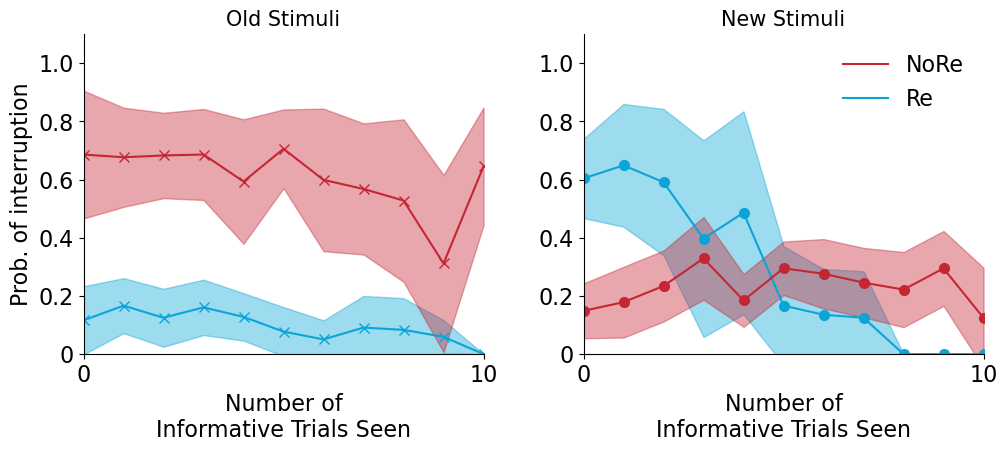

In [18]:
fig, df1, df2 = plot_learning_curves_side_by_side(
    new_confusing_df,
    old_confusing_df,
    ['new','old'],
    informative_trials=np.arange(11),
    ylim=(0, 1.1)
)

plt.show()

fig.savefig(FIGDIR + "3_incongruent_learning_curves.svg", format="svg", bbox_inches="tight")

plt.close(fig)

### Congruent day

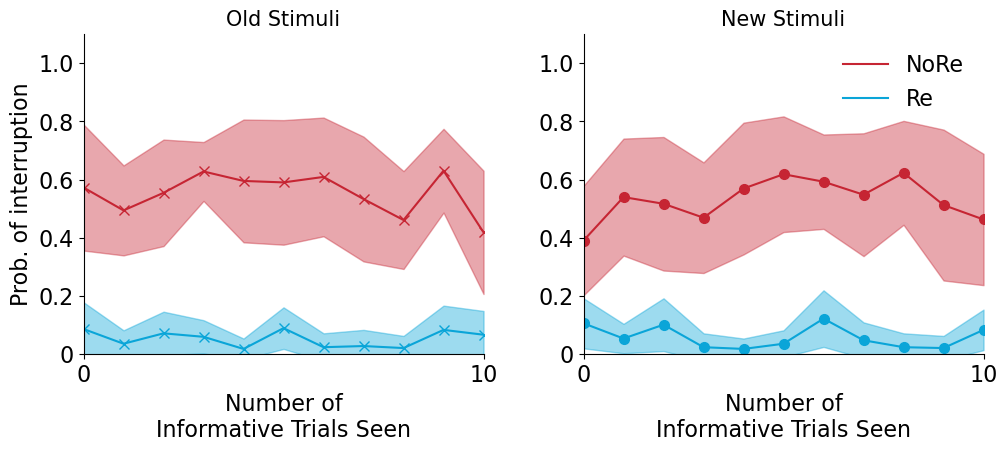

In [19]:

fig, df1, df2 = plot_learning_curves_side_by_side(
    new_control_df,
    old_control_df,
    ['new','old'],
    informative_trials=np.arange(11),
    ylim=(0, 1.1)
)

plt.show()

fig.savefig(FIGDIR + "2_congruent_learning_curves.svg", format="svg", bbox_inches="tight")

plt.close(fig)

# df1

### Odds ratio as function of informative trials

In [20]:
def plot_OR(df_to_plot, test, color_by, y_min = -5, y_max = 10, n_IT = 10):
    fig = plt.figure(figsize=(4, 3))
    ax = plt.gca()
    so_result_df = plot_learning_curve_2(
        df_to_plot,
        np.arange(n_IT + 1),
        ax,
        fill_kwargs=dict(
            color=color_by_call.get(color_by),
            alpha=0.4,
            zorder=-1,
            ),
        line_kwargs = dict(
            color=color_by_call.get(color_by),
            marker=marker_by_test[test],
            markersize=8,
            )
        )
    sig, pcorr = false_discovery(so_result_df["p-value"])
    print("Significance test (FDR corrected):\n {}".format(sig))
    print(" {.5f}".format(pcorr))

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

    # Set limits and axes of plot
    ax.set_xlim(0, n_IT)
    ax.set_xticks([0, n_IT])
    ax.set_xticklabels([0, 10], fontsize=16)
    ax.set_yticks([-1, 0, 1, 2, 3])
    ax.set_yticklabels([-1, 0, 1, 2, 3], fontsize=16)
    ax.hlines(0, *plt.xlim(), zorder=-1, linestyle="--", color="black")

    ax.set_xlabel("Number of\nInformative Trials Seen", fontsize=16)
    set_oddsratio_yticks(ax, biggest=y_max, smallest=y_min, convert_log=False)
    ax.set_ylim(y_min, y_max)
    ax.set_ylabel("Odds Ratio", fontsize=14)# , rotation=0, horizontalalignment="right")

    plt.show()
    # fig.savefig("figures/3CD_learning_curves_song.svg", format="svg", bbox_inches="tight")

    plt.close(fig)

In [21]:
def group_by_subject(df, informative_trials):
    """
    Collect probability of interruption across subjects in each informative trial bin
    
    df: pandas DataFrame filtered down to the trials of interest
    informative_trials: numpy array of integers for the informative trial bins requested (e.g. np.arange(10))
    """
    inform_df = generate_informative_trial_dataframe(df, informative_trials)
    
    # If a subject interrupted all trials or did not interrupt at all within
    # one bin, we want to replace that by a generic interruption probability.
    # We will use 1/2 the average probability of interruption within that bin
    # across all subjects.
    baselines = inform_df.groupby([
        "Relative Informative Trials Seen", "condition_name"
    ])["p(interrupt)"].mean()
    
    baselines_len = inform_df.groupby([
        "Relative Informative Trials Seen", "condition_name"
    ]).size()

    # Generate a dataframe with the log odds of interruption for Rewarded
    # and Nonrewarded trials for each subject in each informative trial bin.
    binned = inform_df.groupby(
        ["Relative Informative Trials Seen", "bird"],
    )
    by_subject_rows = []
    for (bin_idx, subject), subdf in binned:
        baseline_p_rew = baselines.loc[bin_idx, "Rewarded"] / 2
        baseline_p_norew = baselines.loc[bin_idx, "Unrewarded"] / 2

        rew = subdf[subdf["condition_name"] == "Rewarded"]
        norew = subdf[subdf["condition_name"] == "Unrewarded"]
        
        p_rew = np.mean(rew["p(interrupt)"])
        p_norew = np.mean(norew["p(interrupt)"])
        
        ### if 0, replace by baseline. If baseline = 0, we add 1 interrupted trial
        p_rew = p_rew or baseline_p_rew or 1/(baselines_len.loc[bin_idx, "Unrewarded"]+1)
        p_norew = p_norew or baseline_p_norew or 1/(baselines_len.loc[bin_idx, "Rewarded"]+1)
        
        ### if 1, we add 1 wait trial
        if p_rew == 1 : 
            p_rew = (baselines_len.loc[bin_idx, "Rewarded"])/(baselines_len.loc[bin_idx, "Rewarded"]+1)
        if p_norew == 1 :
            p_norew =(baselines_len.loc[bin_idx, "Unrewarded"])/(baselines_len.loc[bin_idx, "Unrewarded"]+1)
        
        norew_logodds = np.log2(p_norew / (1 - p_norew))
        rew_logodds = np.log2(p_rew / (1 - p_rew))
        
        if not np.isnan((norew_logodds - rew_logodds)) : # if not na == if birds still has trials for this bin_idx
            by_subject_rows.append({
                "Log2(OR)": norew_logodds - rew_logodds,
                "Subject": subject,
                "Rewarded Log2 Odds": rew_logodds,
                "Nonrewarded Log2 Odds": norew_logodds,
                "Relative Informative Trials Seen": bin_idx
            })
    by_subject_df = pd.DataFrame(by_subject_rows)
#     display(by_subject_df)
    return by_subject_df

def collect_by_subject(df, informative_trials):
    """
    Collect number of interruption across subjects in each informative trial bin
    
    df: pandas DataFrame filtered down to the trials of interest
    informative_trials: numpy array of integers for the informative trial bins requested (e.g. np.arange(10))
    """
    inform_df = generate_informative_trial_dataframe(df, informative_trials)
    inform_df['NoInt'] = 1
    inform_df['Int'] = inform_df['Bin Size'] - 1
    
    binned = inform_df.groupby(
        ["Relative Informative Trials Seen", "bird", "condition_name"],
    )
    by_subject_rows = []
    for (rit, subject, condition), subdf in binned:
        nInt = np.sum(subdf['Int'])
        nNoInt = np.sum(subdf['NoInt']) 
        if (condition == 'Rewarded') :
            by_subject_rows.append({
                "Subject": subject,
                "Sex": subdf["Subject Sex"].iloc[0],
                "Re": 'Y',
                "Int": nInt,
                "NoInt": nNoInt,
                'RIT': rit
            })
        else:
            by_subject_rows.append({
                "Subject": subject,
                "Sex": subdf["Subject Sex"].iloc[0],
                "Re": 'N',
                "Int": nInt,
                "NoInt": nNoInt,
                'RIT': rit
            })

    by_subject_df = pd.DataFrame(by_subject_rows)
    return by_subject_df

def summarize_across_subjects(grouped_df):
    result_rows = []
    for bin_idx, subdf in grouped_df.groupby("Relative Informative Trials Seen"):
        # Stats
        # Run a paried t test in each bin to test if p_unrew > p_re
        t_stat, p_val = scipy.stats.ttest_rel(subdf["Nonrewarded Log2 Odds"], subdf["Rewarded Log2 Odds"],
                                             alternative='two-sided')
#         p_val = p_val / 2
        n_subject = len(subdf)
        
        mean, sem = jackknife(subdf["Log2(OR)"], np.mean)
        result_rows.append({
            "Relative Informative Trials Seen": bin_idx,
            "n subjects": n_subject,
            "Log2(OR)": mean,
            "SEM": sem,
            "p-value": p_val
        })

    
    result_df = pd.DataFrame(result_rows)
    return result_df


def plot_learning_curve_2(df, informative_trials, ax, test, y_min, y_max,fill_kwargs, n_sem=2, line_kwargs=None):
    """
    Plot the learning curve across subjects for the given trials
    
    df: pandas DataFrame filtered down to the trials of interest
    informative_trials: numpy array of integers for the informative trial bins requested (e.g. np.arange(10))
    """
    learning_df = group_by_subject(df, informative_trials)
    result_df = summarize_across_subjects(learning_df).sort_values("Relative Informative Trials Seen")
    ax.fill_between(
        result_df["Relative Informative Trials Seen"],
        result_df["Log2(OR)"] - 2 * result_df["SEM"],
        result_df["Log2(OR)"] + 2 * result_df["SEM"],
        **fill_kwargs
    )
    
    ax.plot(
        result_df["Relative Informative Trials Seen"],
        result_df["Log2(OR)"],
        **line_kwargs
    )
    
    for IFT, subdf in result_df.groupby("Relative Informative Trials Seen"):
        yi = y_max if test == 'old' else  y_min
        ax.annotate(subdf["n subjects"].values[0],
                xy=(subdf["Relative Informative Trials Seen"], yi), xycoords='data',
                xytext=(0, 0), textcoords='offset points', color = color_by_call[test])
    
    return result_df

In [25]:
def plot_2_OR(df1, df2, test, color_by, y_min = -5, y_max = 10, n_IT = 10):
    fig = plt.figure(figsize=(5, 3))
    ax = plt.gca()
    result_df1 = plot_learning_curve_2(
        df1,
        np.arange(n_IT + 1),
        ax,
        test[0],
        y_min,
        y_max,
        fill_kwargs=dict(
            color=color_by_call[test[0]],
            alpha=0.5,
            zorder=-1),
        line_kwargs = dict(
            color=color_by_call[test[0]],
            marker=marker_by_test[test[0]],
            markersize=8,
            ))
    result_df2 = plot_learning_curve_2(
        df2,
        np.arange(n_IT + 1),
        ax,
        test[1],
        y_min,
        y_max,
        fill_kwargs=dict(
            color=color_by_call[test[1]],
            alpha=0.5,
            zorder=-1,
            ),
        line_kwargs = dict(
            color=color_by_call[test[1]],
            marker=marker_by_test[test[1]],
            markersize=8,
            )
        )
    
    sig, pcorr = false_discovery(result_df1["p-value"])
    print("Significance test (FDR corrected) for new stimuli:\n {}".format(sig))
    print(" {}".format(pcorr))

    sig, pcorr = false_discovery(result_df2["p-value"])
    print("Significance test (False discovery rate) for old stimuli:\n {}".format(sig))
    print(" {}".format(pcorr))

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

    # Set limits and axes of plot
    ax.set_xlim(0, n_IT)
    ax.set_xticks([0, n_IT])
    ax.set_xticklabels([0, 10], fontsize=16)
    ax.set_yticks([-1, 0, 1, 2, 3])
    ax.set_yticklabels([-1, 0, 1, 2, 3], fontsize=16)
    ax.hlines(0, *plt.xlim(), zorder=-1, linestyle="--", color="black")

    ax.set_xlabel("Number of\nInformative Trials Seen", fontsize=16)
    set_oddsratio_yticks(ax, y_max, smallest = y_min, convert_log = False) 
    # set_oddsratio_yticks(ax, biggest=y_max, smallest=y_min, convert_log=False)
    ax.set_ylim(y_min, y_max)
    ax.set_ylabel("Odds Ratio", fontsize=14)# , rotation=0, horizontalalignment="right")
    
    new_artist = plt.Line2D((0,1),(0,0), color='#80b1d3', marker='o', linestyle='-', linewidth = 2, markersize=12)
    old_artist = plt.Line2D((0,1),(0,0), color='#9bcd9b', marker='X', linestyle='-', linewidth = 2, markersize=12)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(
                [old_artist, new_artist, ], 
                [ test[1], test[0]],
                ncol=1, 
                frameon=False,
                fontsize=16,
                loc='center left', 
                bbox_to_anchor=(1, 0.5) )
    
    plt.show()

    plt.close(fig)
    
    return fig, result_df1, result_df2

Statistics are done in R using glme.  The next two cells write the data to be read by R scripts counsStatsConfusionRIT.Rmd

In [22]:
# Congruent day stats
new_control_bysubject_df = collect_by_subject(new_control_df, np.arange(11))
old_control_bysubject_df = collect_by_subject(old_control_df, np.arange(11))

# Write to cvs
new_control_bysubject_df.to_csv(RESULTDIR+'/resultsControlNewR.csv', index=True, header=True)
old_control_bysubject_df.to_csv(RESULTDIR+'/resultsControlOldR.csv', index=True, header=True)

# Confusing day stats
new_confusing_bysubject_df = collect_by_subject(new_confusing_df, np.arange(11))
old_confusing_bysubject_df = collect_by_subject(old_confusing_df, np.arange(11))

# Write to cvs
new_confusing_bysubject_df.to_csv(RESULTDIR+'/resultsConfusingNewR.csv', index=True, header=True)
old_confusing_bysubject_df.to_csv(RESULTDIR+'/resultsConfusingOldR.csv', index=True, header=True)


In [23]:
# Sanity check - this is to see if the log2OR obtained in GLM in R matches the one obtained by averaging the data
intRe = np.sum(new_control_bysubject_df[(new_control_bysubject_df['Re'] == 'Y') & (new_control_bysubject_df['RIT'] == 0)]['Int'])
intNoRe = np.sum(new_control_bysubject_df[(new_control_bysubject_df['Re'] == 'N') & (new_control_bysubject_df['RIT'] == 0)]['Int'])
nointRe = np.sum(new_control_bysubject_df[(new_control_bysubject_df['Re'] == 'Y') & (new_control_bysubject_df['RIT'] == 0)]['NoInt'])
nointNoRe = np.sum(new_control_bysubject_df[(new_control_bysubject_df['Re'] == 'N') & (new_control_bysubject_df['RIT'] == 0)]['NoInt'])

print('Control Day (Congruent):')
print('\tNew Stimuli')
print ('\t\tRe interrupted trials %d/%d p = %.3f' % (intRe, intRe+nointRe, intRe/(intRe+nointRe)))
print ('\t\tNoRe interrupted trials %d/%d p = %.3f' % (intNoRe, intNoRe+nointNoRe, intNoRe/(intNoRe+nointNoRe)))
print ('\t\tLog2OR = %.3f' % (np.log2(intNoRe*nointRe/(intRe*nointNoRe))))

intRe = np.sum(old_control_bysubject_df[(old_control_bysubject_df['Re'] == 'Y') & (old_control_bysubject_df['RIT'] == 0)]['Int'])
intNoRe = np.sum(old_control_bysubject_df[(old_control_bysubject_df['Re'] == 'N') & (old_control_bysubject_df['RIT'] == 0)]['Int'])
nointRe = np.sum(old_control_bysubject_df[(old_control_bysubject_df['Re'] == 'Y') & (old_control_bysubject_df['RIT'] == 0)]['NoInt'])
nointNoRe = np.sum(old_control_bysubject_df[(old_control_bysubject_df['Re'] == 'N') & (old_control_bysubject_df['RIT'] == 0)]['NoInt'])

print('\tOld Stimuli')
print ('\t\tRe interrupted trials %d/%d p = %.3f' % (intRe, intRe+nointRe, intRe/(intRe+nointRe)))
print ('\t\tNoRe interrupted trials %d/%d p = %.3f' % (intNoRe, intNoRe+nointNoRe, intNoRe/(intNoRe+nointNoRe)))
print ('\t\tLog2OR = %.3f' % (np.log2(intNoRe*nointRe/(intRe*nointNoRe))))

# Confusion day
intRe = np.sum(new_confusing_bysubject_df[(new_confusing_bysubject_df['Re'] == 'Y') & (new_confusing_bysubject_df['RIT'] == 0)]['Int'])
intNoRe = np.sum(new_confusing_bysubject_df[(new_confusing_bysubject_df['Re'] == 'N') & (new_confusing_bysubject_df['RIT'] == 0)]['Int'])
nointRe = np.sum(new_confusing_bysubject_df[(new_confusing_bysubject_df['Re'] == 'Y') & (new_confusing_bysubject_df['RIT'] == 0)]['NoInt'])
nointNoRe = np.sum(new_confusing_bysubject_df[(new_confusing_bysubject_df['Re'] == 'N') & (new_confusing_bysubject_df['RIT'] == 0)]['NoInt'])

print('Confusion Day (InCongruent):')
print('\tNew Stimuli')
print ('\t\tRe interrupted trials %d/%d p = %.3f' % (intRe, intRe+nointRe, intRe/(intRe+nointRe)))
print ('\t\tNoRe interrupted trials %d/%d p = %.3f' % (intNoRe, intNoRe+nointNoRe, intNoRe/(intNoRe+nointNoRe)))
print ('\t\tLog2OR = %.3f' % (np.log2(intNoRe*nointRe/(intRe*nointNoRe))))

intRe = np.sum(old_confusing_bysubject_df[(old_confusing_bysubject_df['Re'] == 'Y') & (old_confusing_bysubject_df['RIT'] == 0)]['Int'])
intNoRe = np.sum(old_confusing_bysubject_df[(old_confusing_bysubject_df['Re'] == 'N') & (old_confusing_bysubject_df['RIT'] == 0)]['Int'])
nointRe = np.sum(old_confusing_bysubject_df[(old_confusing_bysubject_df['Re'] == 'Y') & (old_confusing_bysubject_df['RIT'] == 0)]['NoInt'])
nointNoRe = np.sum(old_confusing_bysubject_df[(old_confusing_bysubject_df['Re'] == 'N') & (old_confusing_bysubject_df['RIT'] == 0)]['NoInt'])

print('\tOld Stimuli')
print ('\t\tRe interrupted trials %d/%d p = %.3f' % (intRe, intRe+nointRe, intRe/(intRe+nointRe)))
print ('\t\tNoRe interrupted trials %d/%d p = %.3f' % (intNoRe, intNoRe+nointNoRe, intNoRe/(intNoRe+nointNoRe)))
print ('\t\tLog2OR = %.3f' % (np.log2(intNoRe*nointRe/(intRe*nointNoRe))))

Control Day (Congruent):
	New Stimuli
		Re interrupted trials 9/37 p = 0.243
		NoRe interrupted trials 127/155 p = 0.819
		Log2OR = 3.819
	Old Stimuli
		Re interrupted trials 7/35 p = 0.200
		NoRe interrupted trials 178/206 p = 0.864
		Log2OR = 4.668
Confusion Day (InCongruent):
	New Stimuli
		Re interrupted trials 217/245 p = 0.886
		NoRe interrupted trials 13/41 p = 0.317
		Log2OR = -4.061
	Old Stimuli
		Re interrupted trials 8/36 p = 0.222
		NoRe interrupted trials 465/493 p = 0.943
		Log2OR = 5.861


### congruent day

Significance test (FDR corrected) for new stimuli:
 [ True  True  True  True  True  True  True  True  True  True  True]
 [0.00338977 0.00335895 0.00538647 0.00246117 0.00351019 0.00199904
 0.00252933 0.00348721 0.00010522 0.00327744 0.00887988]
Significance test (False discovery rate) for old stimuli:
 [ True  True  True  True  True  True  True  True  True  True  True]
 [0.00905969 0.00227083 0.0025023  0.00015773 0.00058353 0.01191301
 0.00016183 0.00239071 0.00303282 0.00225001 0.01362622]


/Users/frederictheunissen/anaconda3/envs/bioacoustics/lib/python3.11/site-packages/matplotlib/text.py:1461: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))


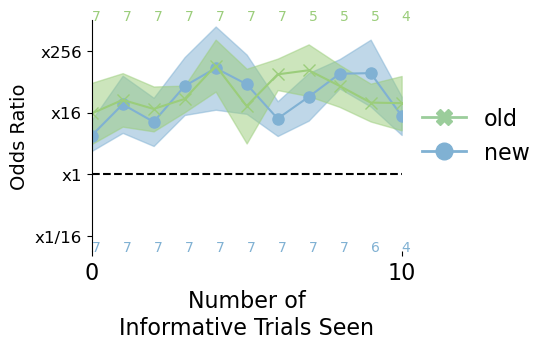

In [26]:
fig, result_new, result_old = plot_2_OR(new_control_df, old_control_df, ['new', 'old'], 'learn_new', y_min = -5, y_max = 10, n_IT = 10)
fig.savefig(FIGDIR + "congruent_OR.svg", format="svg", bbox_inches="tight")

In [27]:
n_IT = 10  # Get data up to 10 informative trials seen
old_learning_df = group_by_subject(old_control_df, np.arange(n_IT+1))
new_learning_df = group_by_subject(new_control_df, np.arange(n_IT+1))

i_IT = 0  # Test difference for 0 informative trials seen
oldLog2OR = old_learning_df[old_learning_df['Relative Informative Trials Seen']== i_IT]["Log2(OR)"]
newLog2OR = new_learning_df[new_learning_df['Relative Informative Trials Seen']== i_IT]["Log2(OR)"]

# Paired t-test

ttest_result = scipy.stats.ttest_rel(oldLog2OR, newLog2OR, alternative='two-sided')

meanNewLog2ORJN = result_new[result_new['Relative Informative Trials Seen'] == i_IT]['Log2(OR)'].values[0]
seNewLog2ORJN = result_new[result_new['Relative Informative Trials Seen'] == i_IT]['SEM'].values[0]
meanNewLog2 = np.mean(newLog2OR)
seNewLog2 = np.sqrt(np.var(newLog2OR, ddof=1)/len(newLog2OR))
meanOldLog2 = np.mean(oldLog2OR)
seOldLog2 = np.sqrt(np.var(oldLog2OR, ddof=1)/len(oldLog2OR))

# The Jackknife and regular estimations are the same for the mean and SEM - just checking here
# print('Novel Stimuli Mean: Log2(OR) = {meanNewLog2:.4f}'.format(meanNewLog2=meanNewLog2))
# print('Novel Stimuli Mean JN: Log2(OR) = {meanNewLog2ORJN:.4f}'.format(meanNewLog2ORJN=meanNewLog2ORJN))
# print('Novel Stimuli SEM: Log2(OR) = {seNewLog2:.4f}'.format(seNewLog2=seNewLog2))
# print('Novel Stimuli SEM JN: Log2(OR) = {seNewLog2ORJN:.4f}'.format(seNewLog2ORJN=seNewLog2ORJN))

# print t-test results
print('Old Vocalisers Log2(OR) = {meanOldLog2:.3f} [{meanOldLog2LB:.3f}, {meanOldLog2UB:.3f}]'.format(meanOldLog2=meanOldLog2, meanOldLog2LB=meanOldLog2-2*seOldLog2, meanOldLog2UB=meanOldLog2+2*seOldLog2))
print('Novel Vocalisers Log2(OR) = {meanNewLog2:.3f} [{meanNewLog2LB:.3f}, {meanNewLog2UB:.3f}]'.format(meanNewLog2=meanNewLog2, meanNewLog2LB=meanNewLog2-2*seNewLog2, meanNewLog2UB=meanNewLog2+2*seNewLog2))
print(ttest_result)


Old Vocalisers Log2(OR) = 3.937 [1.951, 5.923]
Novel Vocalisers Log2(OR) = 2.503 [1.501, 3.506]
TtestResult(statistic=2.0948024565018533, pvalue=0.08105814469567364, df=6)


### incongruent day

Significance test (FDR corrected) for new stimuli:
 [ True  True False False False False False False False  True  True]
 [0.01277301 0.02780513 0.09024966 0.7219969  0.08308309 0.43562449
 0.61489126 0.57323919 0.0547279  0.00726384 0.        ]
Significance test (False discovery rate) for old stimuli:
 [ True  True  True  True  True  True  True  True  True  True  True]
 [0.01829655 0.00738447 0.01166415 0.00801038 0.01071426 0.00021339
 0.00786463 0.03014503 0.03059211 0.01652383 0.00817918]


/Users/frederictheunissen/anaconda3/envs/bioacoustics/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/Users/frederictheunissen/anaconda3/envs/bioacoustics/lib/python3.11/site-packages/matplotlib/text.py:1461: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))


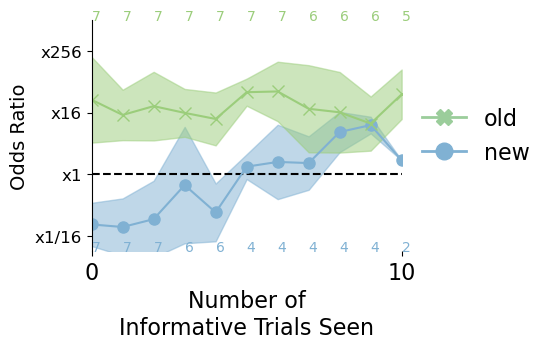

In [28]:
fig, result_new, result_old  = plot_2_OR(new_confusing_df, old_confusing_df, 
          ['new', 'old'], 'learn_new', y_min = -5, y_max = 10, n_IT = 10)
fig.savefig(FIGDIR + "incongruent_OR.svg", format="svg", bbox_inches="tight")

In [29]:
n_IT = 10  # Get data up to 10 informative trials seen
old_learning_df = group_by_subject(confusing_df[confusing_df['Confusing'] == 'Normal'], np.arange(n_IT+1))
new_learning_df = group_by_subject(confusing_df[confusing_df['Confusing'] == 'Confusing'], np.arange(n_IT+1))

i_IT = 0  # Test difference for 0 informative trials seen
oldLog2OR = old_learning_df[old_learning_df['Relative Informative Trials Seen']== i_IT]["Log2(OR)"]
newLog2OR = new_learning_df[new_learning_df['Relative Informative Trials Seen']== i_IT]["Log2(OR)"]

# Paired t-test

ttest_result = scipy.stats.ttest_rel(oldLog2OR, newLog2OR, alternative='two-sided')

meanNewLog2ORJN = result_new[result_new['Relative Informative Trials Seen'] == i_IT]['Log2(OR)'].values[0]
seNewLog2ORJN = result_new[result_new['Relative Informative Trials Seen'] == i_IT]['SEM'].values[0]
meanNewLog2 = np.mean(newLog2OR)
seNewLog2 = np.sqrt(np.var(newLog2OR, ddof=1)/len(newLog2OR))
meanOldLog2 = np.mean(oldLog2OR)
seOldLog2 = np.sqrt(np.var(oldLog2OR, ddof=1)/len(oldLog2OR))


# print t-test results
print('Old Vocalisers Log2(OR) = {meanOldLog2:.3f} [{meanOldLog2LB:.3f}, {meanOldLog2UB:.3f}]'.format(meanOldLog2=meanOldLog2, meanOldLog2LB=meanOldLog2-2*seOldLog2, meanOldLog2UB=meanOldLog2+2*seOldLog2))
print('Novel Vocalisers Log2(OR) = {meanNewLog2:.3f} [{meanNewLog2LB:.3f}, {meanNewLog2UB:.3f}]'.format(meanNewLog2=meanNewLog2, meanNewLog2LB=meanNewLog2-2*seNewLog2, meanNewLog2UB=meanNewLog2+2*seNewLog2))
print(ttest_result)

Old Vocalisers Log2(OR) = 4.827 [2.045, 7.609]
Novel Vocalisers Log2(OR) = -3.267 [-4.671, -1.864]
TtestResult(statistic=4.710235659944886, pvalue=0.0032910836657066692, df=6)


#### legend

[]

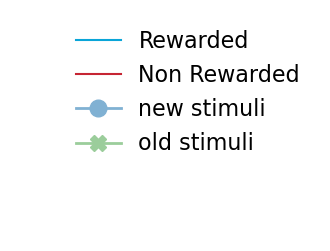

In [30]:
fig = plt.figure(figsize=(4, 3))
ax = plt.gca()
new_artist = plt.Line2D((0,1),(0,0), color='#80b1d3', marker='o', linestyle='-', linewidth = 2, markersize=12)
old_artist = plt.Line2D((0,1),(0,0), color='#9bcd9b', marker='X', linestyle='-', linewidth = 2, markersize=12)
unreartist = plt.Line2D((0,1),(0,0), color=color_by_reward.get("Unrewarded"), marker='', linestyle='-')
reartist = plt.Line2D((0,1),(0,0), color=color_by_reward.get("Rewarded"), marker='', linestyle='-')
ax.legend(
                [ reartist, unreartist, new_artist, old_artist,], 
                [ "Rewarded", 'Non Rewarded', "new stimuli", "old stimuli"],
                ncol=1, 
                frameon=False,
                fontsize=16
            )
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])